# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

### Solution

The code contains a pure abstract class _MetroStep_ containing a virtual method called _Step_. Different classes can be derived from this one to implement the Metropolis step with any symmetrical transition probability $T(\vec{x}|\vec{y}) = T(\vec{y}|\vec{x})$. Two transition probabilities are used: the uniform transition probability within a $2l$-side cube centered in $\vec{y}$ (each coordinate is increased by a uniform random number in $[-l,l]$) and the multivariate normal transition probability (each coordinate is increased by a number drawn from a gaussian $\mathcal{N}(0,\sigma)$). $l$ and $\sigma$ are chosen so that the acceptance rate for the Metropolis is $\sim 50\%$ in both cases and for both the probabilities we are sampling. The move is accepted with probability
$$\alpha = A(\vec{x}|\vec{y})=min \left( 1,\frac{p(\vec{x})}{p(\vec{y})} \right)$$
where $p$, the probability we aim to sample, is passed to _Step_ as pointer to another abstract class, so that a generic distribution can be sampled.

The function _DataBlocking_, after equilibrating the sampling for $10^4$ steps starting from the point $(10, 10, 10)$ (which is more than enough to reach the high-probability region), performs a simulation of $M=2\times10^6$ steps divided into $N=200$ blocks, accumulates the radius after each step and computes the averages and errors.

The sampling of $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ is made with both transition probabilities, which produce the same results, as illustrated by their comparison below.

#### Ground state 1s: sampling $|\Psi_{1,0,0}(x,y,z)|^2$

The parameters chosen to have $50\%$ of acceptance are (in Bohr radius units): $l=1.2$, $\sigma=0.75$.

The following picture shows $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and its uncertainty as a function of the number of blocks. Its value is compatible with the expected $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}$ (in Bohr radius units).

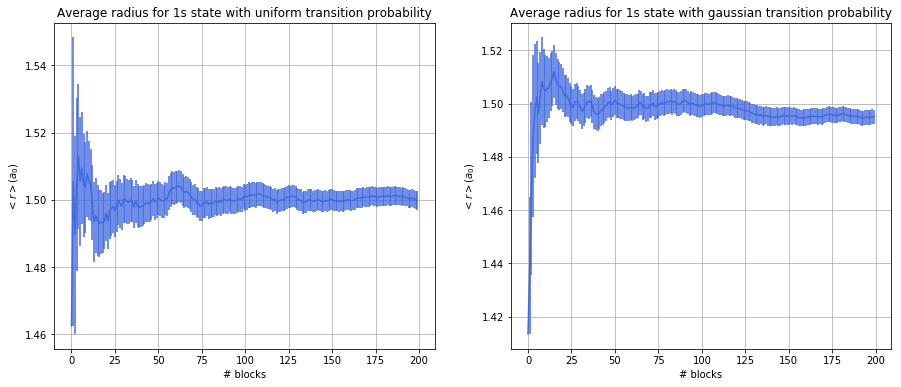

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

rad_1s_unif=np.loadtxt("radii/1s_radii_unif.out")
block_1s_unif=range(len(rad_1s_unif[:,0]))

rad_1s_gauss=np.loadtxt("radii/1s_radii_gauss.out")
block_1s_gauss=range(len(rad_1s_gauss[:,0]))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].errorbar(block_1s_unif, rad_1s_unif[:,0], yerr=rad_1s_unif[:,1], color='royalblue')
ax[0].set_title('Average radius for 1s state with uniform transition probability')
ax[0].set_xlabel("# blocks")
ax[0].set_ylabel("$<r> (a_0)$")
ax[0].grid(True)

ax[1].errorbar(block_1s_gauss, rad_1s_gauss[:,0], yerr=rad_1s_gauss[:,1], color='royalblue')
ax[1].set_title('Average radius for 1s state with gaussian transition probability')
ax[1].set_xlabel("# blocks")
ax[1].set_ylabel("$<r> (a_0)$")
ax[1].grid(True)

As a further check the radial distribution is here extracted from the sampled points and reported in a histogram. It is compared to the analytical distribution $p_{1,0,0}(r)$ obtained by integration of the squared modulus of the wavefunction in polar coordinates as follows ($a_0=1$).

$$
|\Psi_{1,0,0}(r, \theta, \phi)|^2 = \frac{1}{\pi}e^{-2r}
$$
$$
p_{1,0,0}(r) = r^2 \int_0^{2\pi} d\phi \int_0^\pi d\theta \sin(\theta) |\Psi_{1,0,0}(r, \theta, \phi)|^2 = 4\pi r^2 \frac{1}{\pi}e^{-2r} = 4r^2 e^{-2r}
$$

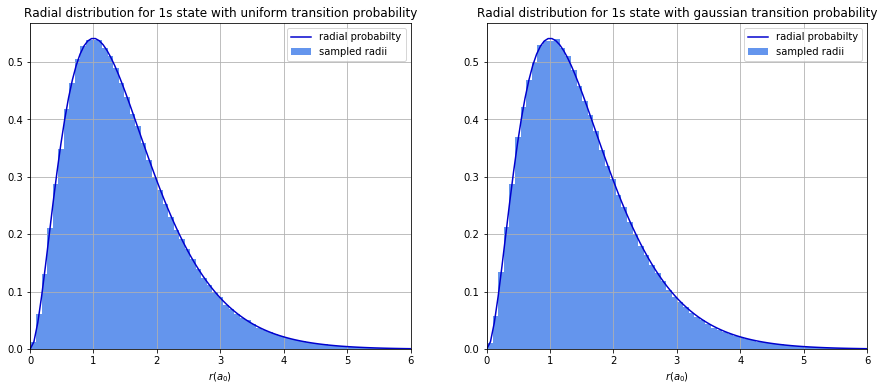

In [2]:
X_1s_unif=np.loadtxt("points/1s_points_unif.out")
r_1s_unif=(X_1s_unif[:,0]**2+X_1s_unif[:,1]**2+X_1s_unif[:,2]**2)**0.5

X_1s_gauss=np.loadtxt("points/1s_points_gauss.out")
r_1s_gauss=(X_1s_gauss[:,0]**2+X_1s_gauss[:,1]**2+X_1s_gauss[:,2]**2)**0.5

r=np.linspace(0,6,100)
r_distr_1s=4*r**2*np.exp(-2*r)  #radial distribution for 1s state

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(r_1s_unif, bins=100, density=True, color='cornflowerblue', label='sampled radii')
ax[0].plot(r, r_distr_1s, color='mediumblue', label='radial probabilty')
ax[0].legend()
ax[0].set_title('Radial distribution for 1s state with uniform transition probability')
ax[0].set_xlim(0,6)
ax[0].set_xlabel('$r (a_0)$')
ax[0].grid(True)

ax[1].hist(r_1s_gauss, bins=100, density=True, color='cornflowerblue', label='sampled radii')
ax[1].plot(r, r_distr_1s, color='mediumblue', label='radial probabilty')
ax[1].legend()
ax[1].set_title('Radial distribution for 1s state with gaussian transition probability')
ax[1].set_xlim(0,6)
ax[1].set_xlabel('$r (a_0)$')
ax[1].grid(True)

The sampled points in the 3D space exactly reproduce the spherical shape of a $1s$ orbital.

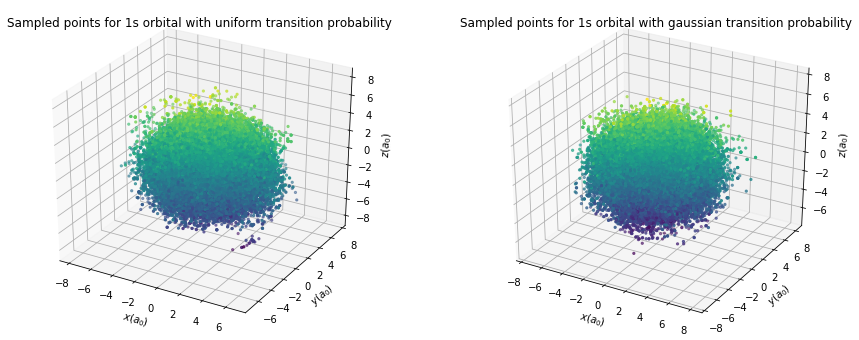

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X_1s_unif[:,0], X_1s_unif[:,1], X_1s_unif[:,2], c=X_1s_unif[:,2], marker='.')
ax.set_title('Sampled points for 1s orbital with uniform transition probability')
ax.set_xlabel('$x (a_0)$')
ax.set_ylabel('$y (a_0)$')
ax.set_zlabel('$z (a_0)$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X_1s_gauss[:,0], X_1s_gauss[:,1], X_1s_gauss[:,2], c=X_1s_gauss[:,2], marker='.')
ax.set_title('Sampled points for 1s orbital with gaussian transition probability')
ax.set_xlabel('$x (a_0)$')
ax.set_ylabel('$y (a_0)$')
ax.set_zlabel('$z (a_0)$')

plt.show()

#### Excited state 2p: sampling $|\Psi_{2,1,0}(x,y,z)|^2$

The parameters chosen to have $50\%$ of acceptance are (in Bohr radius units): $l=3$, $\sigma=1.9$.

The following picture shows $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and its uncertainty as a function of the number of blocks. Its value is compatible with the expected $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5$ (in Bohr radius units).

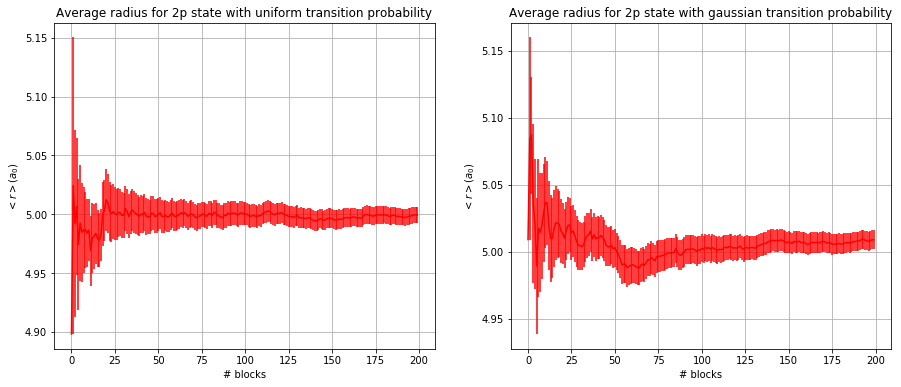

In [5]:
rad_2p_unif=np.loadtxt("radii/2p_radii_unif.out")
block_2p_unif=range(len(rad_2p_unif[:,0]))

rad_2p_gauss=np.loadtxt("radii/2p_radii_gauss.out")
block_2p_gauss=range(len(rad_2p_gauss[:,0]))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].errorbar(block_2p_unif, rad_2p_unif[:,0], yerr=rad_2p_unif[:,1], color='r')
ax[0].set_title('Average radius for 2p state with uniform transition probability')
ax[0].set_xlabel("# blocks")
ax[0].set_ylabel("$<r> (a_0)$")
ax[0].grid(True)

ax[1].errorbar(block_2p_gauss, rad_2p_gauss[:,0], yerr=rad_2p_gauss[:,1], color='r')
ax[1].set_title('Average radius for 2p state with gaussian transition probability')
ax[1].set_xlabel("# blocks")
ax[1].set_ylabel("$<r> (a_0)$")
ax[1].grid(True)

The radial distribution obtained by sampling with the Metropolis is again compared to the analytic distribution $p_{2,1,0}(r)$.

$$
|\Psi_{2,1,0}(r, \theta, \phi)|^2 = \frac{1}{32\pi} r^2 e^{-r} \cos^2(\theta)
$$
$$
p_{2,1,0}(r) = r^2 \int_0^{2\pi} d\phi \int_0^\pi d\theta \sin(\theta) |\Psi_{2,1,0}(r, \theta, \phi)|^2 = \\
2\pi r^2 \frac{1}{32\pi} r^2 e^{-r} \int_0^\pi d\theta \sin(\theta) \cos^2(\theta) = \\
\frac{1}{16} r^4 e^{-r} \left[ -\frac{\cos^3(\theta)}{3} \right]_0^\pi =
\frac{1}{24} r^4 e^{-r}
$$

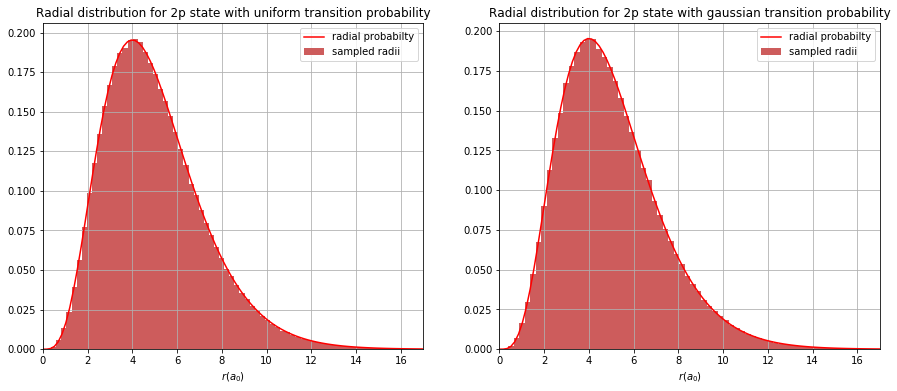

In [6]:
X_2p_unif=np.loadtxt("points/2p_points_unif.out")
r_2p_unif=(X_2p_unif[:,0]**2+X_2p_unif[:,1]**2+X_2p_unif[:,2]**2)**0.5

X_2p_gauss=np.loadtxt("points/2p_points_gauss.out")
r_2p_gauss=(X_2p_gauss[:,0]**2+X_2p_gauss[:,1]**2+X_2p_gauss[:,2]**2)**0.5

r=np.linspace(0,17,100)
r_distr_2p=r**4*np.exp(-r)/24  #radial distribution for 2p state

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].hist(r_2p_unif, bins=100, density=True, color='indianred', label='sampled radii')
ax[0].plot(r, r_distr_2p, color='red', label='radial probabilty')
ax[0].legend()
ax[0].set_title('Radial distribution for 2p state with uniform transition probability')
ax[0].set_xlim(0,17)
ax[0].set_xlabel('$r (a_0)$')
ax[0].grid(True)

ax[1].hist(r_2p_gauss, bins=100, density=True, color='indianred', label='sampled radii')
ax[1].plot(r, r_distr_2p, color='red', label='radial probabilty')
ax[1].legend()
ax[1].set_title('Radial distribution for 2p state with gaussian transition probability')
ax[1].set_xlim(0,17)
ax[1].set_xlabel('$r (a_0)$')
ax[1].grid(True)

The sampled points in the 3D space reproduce the shape of a $2p_z$ orbital with two lobes specular with respect to the x-y plan.

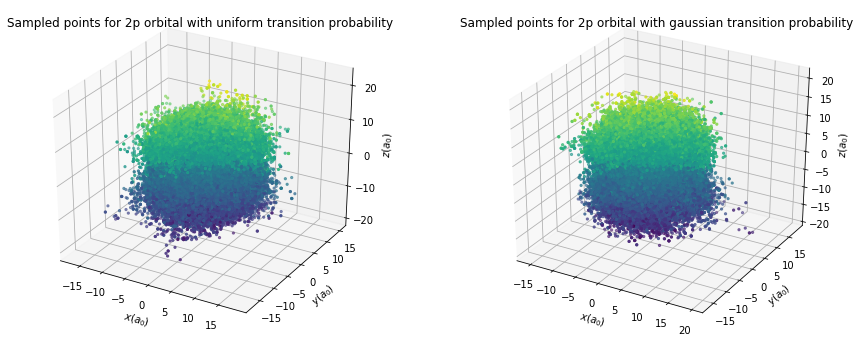

In [8]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(X_2p_unif[:,0], X_2p_unif[:,1], X_2p_unif[:,2], c=X_2p_unif[:,2], marker='.')
ax.set_title('Sampled points for 2p orbital with uniform transition probability')
ax.set_xlabel('$x (a_0)$')
ax.set_ylabel('$y (a_0)$')
ax.set_zlabel('$z (a_0)$')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(X_2p_gauss[:,0], X_2p_gauss[:,1], X_2p_gauss[:,2], c=X_2p_gauss[:,2], marker='.')
ax.set_title('Sampled points for 2p orbital with gaussian transition probability')
ax.set_xlabel('$x (a_0)$')
ax.set_ylabel('$y (a_0)$')
ax.set_zlabel('$z (a_0)$')

plt.show()

#### Starting far from the origin

By running simulations with starting point $\vec{x}=(x, x, x)$ for increasing $x$, one observes that for $x \geq 900$ approximately the sampling is confined in the nearbies of the starting point and does not equilibrate to the desired distribution whatever number of steps are taken. Indeed for such values of $x$ the probability $p(\vec{x})$ cannot be correctly computed as it exceeds the smallest number representable in double precision (it returns $0$ if printed out) and thus the move is always accepted. This is confirmed by the acceptance fraction being $1$ when the simulation is run with such starting condition. Therefore the Metropolis algorithm basically produces a 3D random walk around the starting point. This can be seen in the following image, which shows the radii distribution after $10^4$ equilibration steps for the ground state $1s$ with $x=900$: the distribution is confined near $\sqrt{3} \times 900 \approx 1559$ and does not reach the equilibrium even after $2 \times 10^4$ steps.

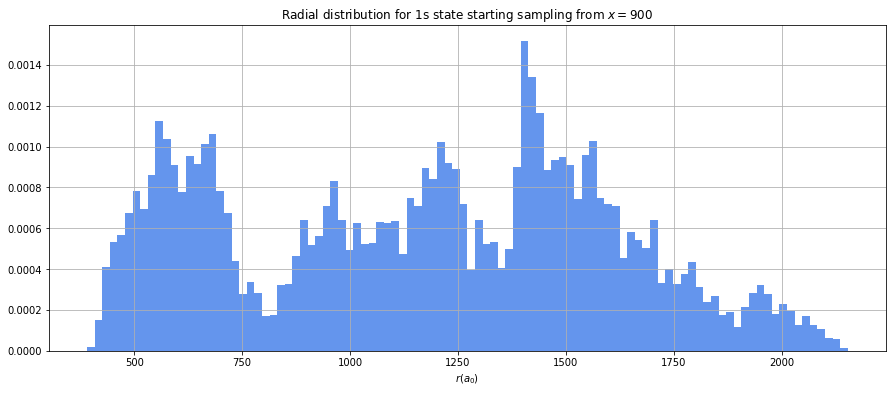

In [7]:
X_1s_900=np.loadtxt("points/1s_points_900.out")
r_1s_900=(X_1s_900[:,0]**2+X_1s_900[:,1]**2+X_1s_900[:,2]**2)**0.5

plt.figure(figsize=(15,6))
plt.hist(r_1s_900, bins=100, density=True, color='cornflowerblue')
plt.title('Radial distribution for 1s state starting sampling from $x=900$')
plt.xlabel('$r (a_0)$')
plt.grid(True)
plt.show()